<a href="https://colab.research.google.com/github/sandeepshrigondekar/TrafficLightDetection/blob/main/TLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
# List the content of your local computer folder 
!ls -la "/content/gdrive/My Drive/"

total 151266
-rw------- 1 root root    226539 Jun  9  2014 '100008253362 (1).pdf'
-rw------- 1 root root    237990 Jul 19  2014  100008253362.pdf
-rw------- 1 root root      6918 Aug 24  2014  210814EC02008317.pdf
-rw------- 1 root root    265568 Nov 19 17:53  Automation.pptx
drwx------ 2 root root      4096 Dec 26 05:17 'Bosch Dataset'
-rw------- 1 root root     91081 Oct 11  2014  CAS_31082014_32371670.pdf
drwx------ 2 root root      4096 Jan 27  2020 'Colab Notebooks'
-rw------- 1 root root 150828752 Jun 21  2020  creditcard.csv
-rw------- 1 root root   3177781 Jul 14 05:51  Docs.zip
-rw------- 1 root root     18723 Sep  6  2014 'ELITE I20.XLS'
-rw------- 1 root root       151 Mar  7  2010 'General Information all tours[1].gdoc'
-rw------- 1 root root     19670 Dec 15 03:46  GYM-Data.xlsx
drwx------ 2 root root      4096 Jul 28  2019  IITB-DS-ML
drwx------ 2 root root      4096 Sep  1 22:56  LJMU-MS
drwx------ 2 root root      4096 Sep  1 22:59  Personal


In [25]:
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [27]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5931, done.
remote: Total 5931 (delta 0), reused 0 (delta 0), pack-reused 5931
Receiving objects: 100% (5931/5931), 6.35 MiB | 31.10 MiB/s, done.
Resolving deltas: 100% (3924/3924), done.
/content/darknet/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutiona

In [30]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-02 07:45:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  5.87MB/s    in 46s     

2021-01-02 07:46:38 (5.13 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [31]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [32]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

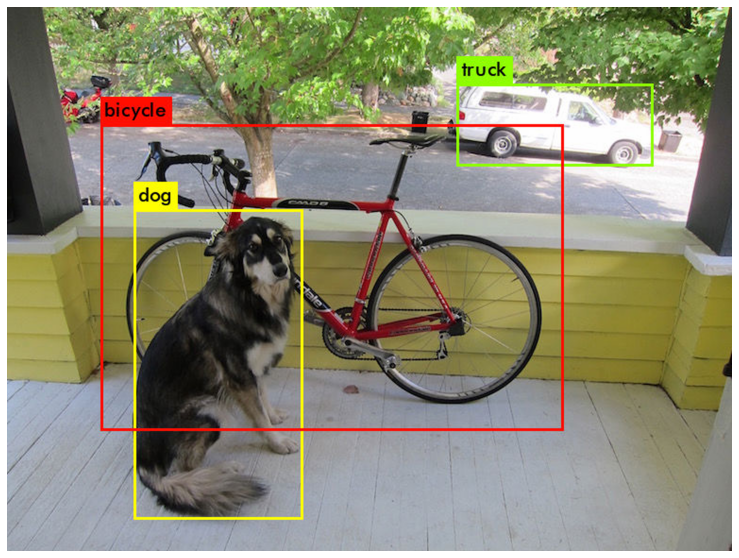

In [33]:
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [12]:
#Start of TLD

In [20]:
!git clone git@github.com:bosch-ros-pkg/bstld.git

Cloning into 'bstld'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [21]:
!git clone https://github.com/bosch-ros-pkg/bstld.git

Cloning into 'bstld'...
remote: Enumerating objects: 89, done.
remote: Total 89 (delta 0), reused 0 (delta 0), pack-reused 89
Unpacking objects: 100% (89/89), done.


In [23]:
%mkdir traffic_light_images
!find PATH_TO_DATASET/rgb/train/ -type f -print0 | xargs -0 --no-run-if-empty mv --target-directory=PATH_TO_DATASET/rgb/train/traffic_light_images/

find: ‘PATH_TO_DATASET/rgb/train/’: No such file or directory
